# Understanding Support Vector Machines (SVM) with Scikit-Learn

Support Vector Machine (SVM) is a powerful and versatile supervised machine learning algorithm used for both classification and regression tasks, although it's more commonly applied to classification problems. The core idea is to find an optimal hyperplane that best separates different classes in the feature space.

### Key Concepts

1.  **Hyperplane:** In an N-dimensional space (where N is the number of features), a hyperplane is a flat subspace of dimension N-1. For example:
    *   In 2D (2 features), a hyperplane is a line.
    *   In 3D (3 features), a hyperplane is a plane.
    SVM aims to find the hyperplane that best separates the data points of different classes.

2.  **Support Vectors:** These are the data points closest to the hyperplane. They are the critical elements of the dataset because they are the ones that influence the position and orientation of the optimal hyperplane. If these points were moved, the hyperplane would likely change.

3.  **Margin:** The margin is the distance between the hyperplane and the nearest data points (the support vectors) from either class. SVM tries to maximize this margin. A larger margin generally leads to a better generalization performance (the model performs better on unseen data).

    *   **Maximum Margin Hyperplane:** The optimal hyperplane is the one that maximizes this margin.

4.  **Linear Separability:** If the data can be perfectly separated by a hyperplane, it's called linearly separable. SVM works well in these cases.

5.  **Non-Linear Separability & the Kernel Trick:** What if the data isn't linearly separable? SVM can still work using the **kernel trick**. The idea is to map the original data into a higher-dimensional space where it *becomes* linearly separable. Common kernels include:
    *   **Linear Kernel:** `kernel='linear'`. Used for linearly separable data (equivalent to not using a kernel trick).
    *   **Polynomial Kernel:** `kernel='poly'`. Maps data to a higher-dimensional space using polynomial functions. Requires tuning the `degree` parameter.
    *   **Radial Basis Function (RBF) Kernel:** `kernel='rbf'`. Maps data to an infinite-dimensional space. This is often the default and most popular kernel. It requires tuning the `gamma` parameter.
    *   **Sigmoid Kernel:** `kernel='sigmoid'`.
    The kernel trick is computationally efficient because it calculates the relationships (dot products) between points in the higher-dimensional space without actually transforming the data into that space.

6.  **Regularization Parameter (C):** SVM has a parameter `C` that controls the trade-off between maximizing the margin and minimizing the classification error on the training data.
    *   **Small C:** Creates a larger margin but allows more misclassifications (potentially underfitting, higher bias, lower variance). It prioritizes a simpler decision boundary.
    *   **Large C:** Creates a smaller margin but tries to classify all training points correctly (potentially overfitting, lower bias, higher variance). It's more sensitive to individual data points.

7.  **Gamma Parameter (γ):** Used primarily with the RBF kernel. It defines how much influence a single training example has. 
    *   **Low Gamma:** Means a larger similarity radius; points farther apart are considered similar. Leads to a smoother, more general decision boundary (potentially underfitting).
    *   **High Gamma:** Means a smaller similarity radius; only points close to each other are considered similar. Leads to a more complex, wiggly decision boundary that closely fits the training data (potentially overfitting).

### Pros and Cons of SVM

**Pros:**
*   **Effective in High-Dimensional Spaces:** Works well even when the number of dimensions is greater than the number of samples.
*   **Memory Efficient:** Uses a subset of training points (support vectors) in the decision function.
*   **Versatile:** Different kernel functions can be specified for the decision function.
*   **Effective when classes are well-separated:** Finds the optimal margin.

**Cons:**
*   **Computationally Intensive:** Can be slow to train, especially on very large datasets (complexity depends on the kernel and data size).
*   **Sensitive to Parameter Choice:** Performance heavily depends on the choice of kernel, the regularization parameter `C`, and kernel-specific parameters like `gamma`.
*   **Requires Feature Scaling:** Like KNN, SVM is sensitive to the scale of features. Standardization or normalization is crucial.
*   **Not Great with Noisy Data/Overlapping Classes:** If classes overlap significantly, SVM might struggle to find a good separating hyperplane.
*   **Less Interpretable:** The model, especially with non-linear kernels, can be difficult to interpret compared to simpler models like decision trees.

### Implementation with Scikit-Learn

#### 1. Import Libraries

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.datasets import make_circles # To generate non-linearly separable data

# Configure plots for better visualization
# Check available styles and use a compatible one if seaborn-v0_8-whitegrid is not found
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except OSError:
    plt.style.use('ggplot') # Fallback style
    print("Style 'seaborn-v0_8-whitegrid' not found, using 'ggplot' instead.")

#### 2. Generate Data

Let's generate non-linearly separable data using `make_circles`. This type of data is ideal for demonstrating the power of SVM kernels.

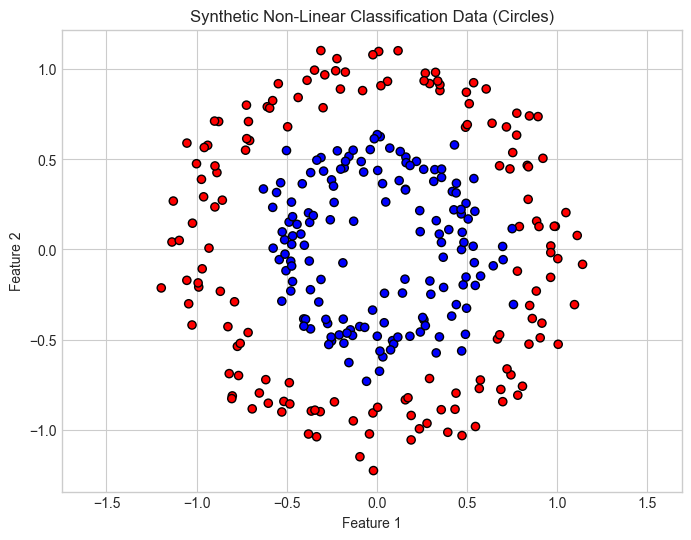

First 5 rows of the dataset:
   Feature 1  Feature 2  Target
0  -0.181361   0.452061       1
1   0.346484  -0.485260       1
2   0.357606   0.038386       1
3   0.833475   0.465843       0
4  -0.467990  -0.178161       1


In [2]:
# Generate synthetic non-linear data (two circles)
X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)

# Visualize the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors='k', s=35)
plt.title('Synthetic Non-Linear Classification Data (Circles)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.axis('equal') # Ensure circles look like circles
plt.show()

# Convert to DataFrame for easier viewing (optional)
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y
print("First 5 rows of the dataset:")
print(df.head())

#### 3. Train/Test Split

Split the data into training and testing sets.

In [3]:
# Split the dataset into Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 225 samples
Test set size: 75 samples


#### 4. Feature Scaling

**Crucial Step for SVM:** As SVM relies on distances (implicitly through dot products in kernel calculations) and finding margins, feature scaling is essential. We'll use `StandardScaler`.

In [4]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Use the same scaler fitted on train data

# Display scaled data (optional)
print("\nFirst 5 rows of scaled training data:")
print(pd.DataFrame(X_train_scaled, columns=['Feature 1', 'Feature 2']).head())


First 5 rows of scaled training data:
   Feature 1  Feature 2
0   0.745472   0.396935
1   0.797497   1.544161
2  -1.922426  -0.296232
3   0.990252   1.576181
4   1.150358   0.035123


#### 5. Training the SVM Model

Now we create and train the SVM classifier using scikit-learn's `SVC` (Support Vector Classifier).

Since our data is non-linearly separable, a linear kernel won't work well. We'll use the **RBF kernel**, which is often a good default choice.

Key parameters for `SVC`:
*   `C`: Regularization parameter (default=1.0).
*   `kernel`: Specifies the kernel type ('linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable). Default is 'rbf'.
*   `gamma`: Kernel coefficient for 'rbf', 'poly' and 'sigmoid'. If `gamma='scale'` (default) is passed then it uses `1 / (n_features * X.var())` as value of gamma. If ‘auto’, uses `1 / n_features`.
*   `degree`: Degree of the polynomial kernel function ('poly'). Ignored by all other kernels.
*   `probability`: Whether to enable probability estimates (default=False). Enabling this slows down training.

In [5]:
# Create and train the SVM classifier with RBF kernel
# We'll start with default C=1.0 and gamma='scale'
classifier_rbf = SVC(kernel='rbf', random_state=42, C=1.0, gamma='scale')

classifier_rbf.fit(X_train_scaled, y_train)
print(f"SVM Classifier created with RBF kernel (C={classifier_rbf.C}, gamma={classifier_rbf.gamma})")

SVM Classifier created with RBF kernel (C=1.0, gamma=scale)


#### 6. Making Predictions

In [6]:
# Predict the Test set results
y_pred_rbf = classifier_rbf.predict(X_test_scaled)

# Display predictions vs actual values (optional)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted (RBF)': y_pred_rbf})
print("\nFirst 10 predictions (RBF Kernel):")
print(results_df.head(10))


First 10 predictions (RBF Kernel):
   Actual  Predicted (RBF)
0       1                1
1       1                1
2       1                1
3       1                1
4       1                1
5       0                0
6       1                1
7       0                0
8       1                1
9       1                1


#### 7. Evaluating the Model (RBF Kernel)

In [7]:
# Evaluate the RBF kernel model
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
report_rbf = classification_report(y_test, y_pred_rbf)

print("\n--- Model Evaluation (RBF Kernel) ---")
print("Confusion Matrix:")
print(cm_rbf)
print(f"\nAccuracy: {acc_rbf:.4f}")
print("\nClassification Report:")
print(report_rbf)


--- Model Evaluation (RBF Kernel) ---
Confusion Matrix:
[[33  0]
 [ 0 42]]

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        42

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



#### 8. Visualizing the Decision Boundary (RBF Kernel)

Let's visualize the non-linear decision boundary created by the RBF kernel.

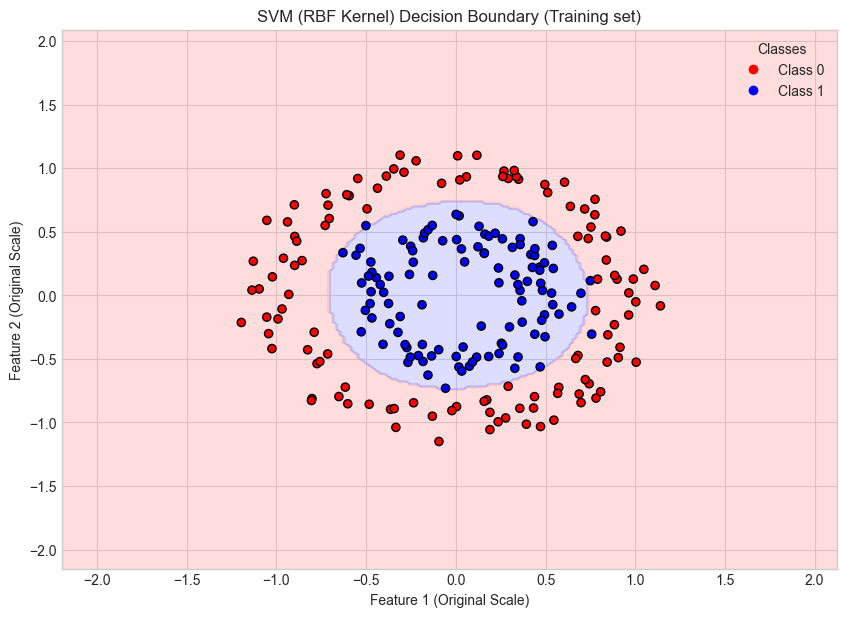

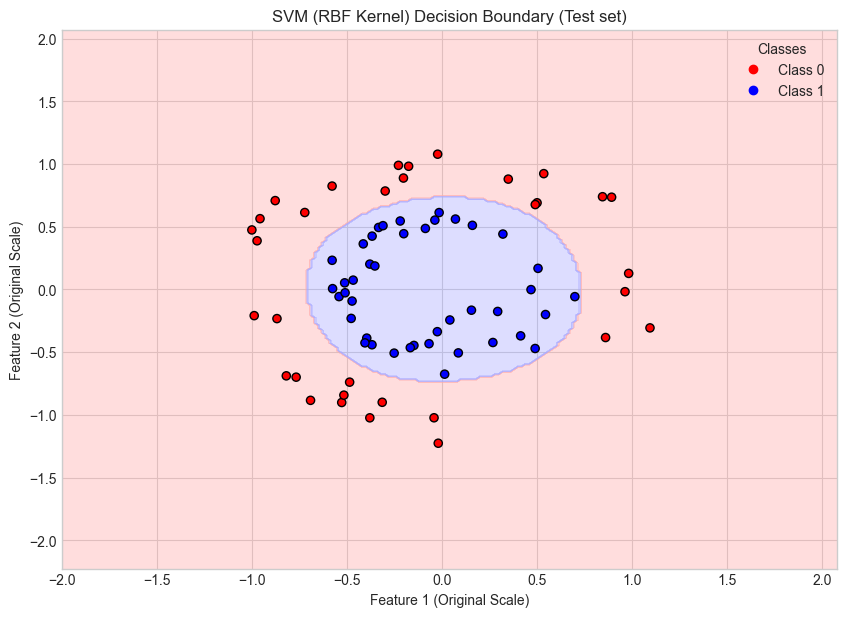

In [8]:
# Function to plot decision boundaries (reusable)
def plot_decision_boundary(X, y, classifier, scaler, title):
    # Use the scaler provided to handle meshgrid scaling
    X_set, y_set = X, y # Expecting scaled data here
    
    # Create mesh grid using the original data range, then scale it
    X_orig = scaler.inverse_transform(X) # Get original scale for limits
    x_min, x_max = X_orig[:, 0].min() - 1, X_orig[:, 0].max() + 1
    y_min, y_max = X_orig[:, 1].min() - 1, X_orig[:, 1].max() + 1
    
    # Create meshgrid in original scale
    xx_orig, yy_orig = np.meshgrid(np.arange(x_min, x_max, 0.02),
                                   np.arange(y_min, y_max, 0.02))
    
    # Scale the meshgrid points for prediction
    mesh_points = np.c_[xx_orig.ravel(), yy_orig.ravel()]
    mesh_points_scaled = scaler.transform(mesh_points)
    
    # Predict the class for each point in the scaled mesh grid
    Z = classifier.predict(mesh_points_scaled)
    Z = Z.reshape(xx_orig.shape)

    # Plot the contour and the data points (using original scale for axes)
    plt.figure(figsize=(10, 7))
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF']) # Light red/blue background
    cmap_bold = ListedColormap(['#FF0000', '#0000FF']) # Red/blue points
    
    plt.contourf(xx_orig, yy_orig, Z, alpha=0.4, cmap=cmap_light)
    plt.xlim(xx_orig.min(), xx_orig.max())
    plt.ylim(yy_orig.min(), yy_orig.max())

    # Plot the actual data points (using original scale)
    scatter = plt.scatter(X_orig[:, 0], X_orig[:, 1], c=y_set, cmap=cmap_bold, edgecolors='k', s=35)
    
    # Create legend handles manually
    try:
        handles, labels = scatter.legend_elements()
        class_labels = [f'Class {i}' for i in np.unique(y)]
        plt.legend(handles=handles, labels=class_labels, title="Classes")
    except ValueError:
        print("Could not generate legend elements. Ensure data points exist for all classes.")

    plt.title(title)
    plt.xlabel('Feature 1 (Original Scale)')
    plt.ylabel('Feature 2 (Original Scale)')
    plt.grid(True)
    plt.show()

# Plot for Training Set (RBF Kernel)
plot_decision_boundary(X_train_scaled, y_train, classifier_rbf, scaler, f'SVM (RBF Kernel) Decision Boundary (Training set)')

# Plot for Test Set (RBF Kernel)
plot_decision_boundary(X_test_scaled, y_test, classifier_rbf, scaler, f'SVM (RBF Kernel) Decision Boundary (Test set)')

#### 9. Trying a Linear Kernel (for comparison)

Let's see what happens if we try to use a linear kernel on this non-linearly separable data. We expect poor performance.


--- Model Evaluation (Linear Kernel) ---
Accuracy: 0.4400

Classification Report:
              precision    recall  f1-score   support

           0       0.44      1.00      0.61        33
           1       0.00      0.00      0.00        42

    accuracy                           0.44        75
   macro avg       0.22      0.50      0.31        75
weighted avg       0.19      0.44      0.27        75



g:\Scikit-Learn-Tutorial\virtualenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\Scikit-Learn-Tutorial\virtualenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\Scikit-Learn-Tutorial\virtualenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


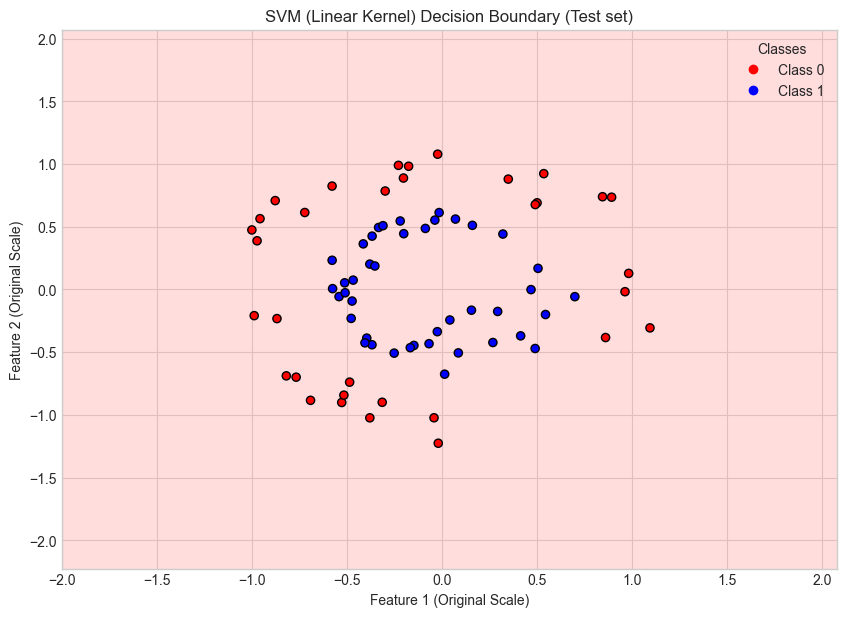

In [9]:
# Create and train the SVM classifier with Linear kernel
classifier_linear = SVC(kernel='linear', random_state=42)
classifier_linear.fit(X_train_scaled, y_train)

# Predict and Evaluate
y_pred_linear = classifier_linear.predict(X_test_scaled)
acc_linear = accuracy_score(y_test, y_pred_linear)

print("\n--- Model Evaluation (Linear Kernel) ---")
print(f"Accuracy: {acc_linear:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear))

# Plot Decision Boundary (Linear Kernel)
plot_decision_boundary(X_test_scaled, y_test, classifier_linear, scaler, f'SVM (Linear Kernel) Decision Boundary (Test set)')

As expected, the linear kernel performs poorly on this dataset because it can only create a straight line to separate the classes, which is insufficient for the circular data structure.

#### 10. Hyperparameter Tuning using GridSearchCV

The performance of SVM, especially with the RBF kernel, is sensitive to the `C` and `gamma` parameters. We can use `GridSearchCV` to systematically explore different combinations of these parameters and find the best ones based on cross-validation performance.

*   **Cross-Validation:** Splits the training data into multiple folds (e.g., 5 or 10). Trains the model on k-1 folds and validates on the remaining fold, repeating this process for all folds. This gives a more robust estimate of the model's performance than a single train/test split.
*   **Grid Search:** Defines a grid of parameter values to try. `GridSearchCV` trains and evaluates a model for every combination in the grid using cross-validation.


Starting GridSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best parameters found by GridSearchCV:
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Best cross-validation accuracy: 0.9956

--- Evaluation of Best Model found by GridSearchCV (on Test Set) ---
Test Set Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        42

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



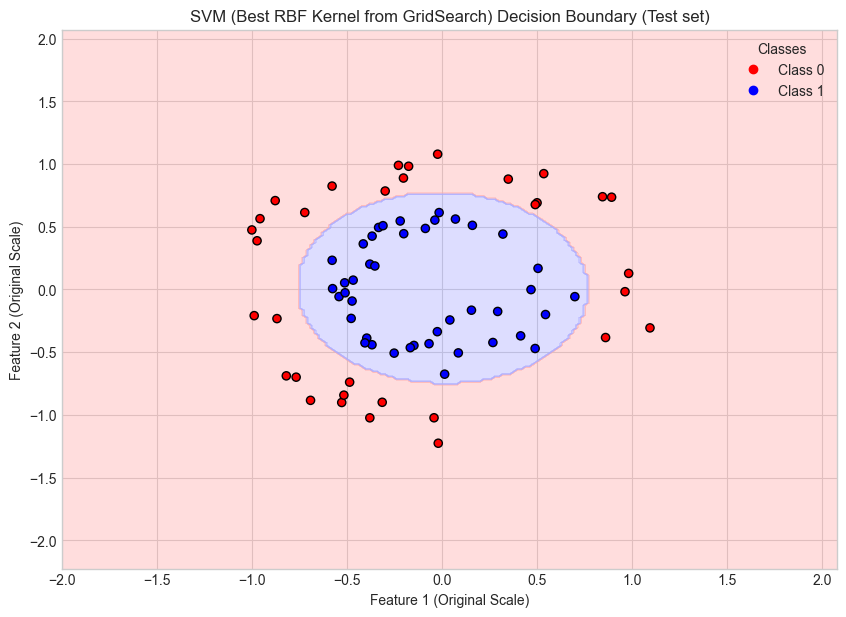

In [10]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1, 10], # Kernel coefficient
    'kernel': ['rbf']                # We focus on RBF for this data
}

# Create a GridSearchCV object
# cv=5 means 5-fold cross-validation
# n_jobs=-1 uses all available CPU cores
grid_search = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=2, cv=5, n_jobs=-1)

# Fit the grid search to the scaled training data
print("\nStarting GridSearchCV...")
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Print the best cross-validation score
print(f"\nBest cross-validation accuracy: {grid_search.best_score_:.4f}")

# Use the best estimator found by GridSearchCV to make predictions
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)

# Evaluate the best model on the test set
acc_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

print("\n--- Evaluation of Best Model found by GridSearchCV (on Test Set) ---")
print(f"Test Set Accuracy: {acc_best:.4f}")
print("\nClassification Report:")
print(report_best)

# Plot Decision Boundary for the best model
plot_decision_boundary(X_test_scaled, y_test, best_svm, scaler, f'SVM (Best RBF Kernel from GridSearch) Decision Boundary (Test set)')

### Conclusion

This notebook demonstrated the Support Vector Machine algorithm for classification.

Key takeaways:
*   SVM aims to find the maximum margin hyperplane separating classes.
*   Support vectors are the critical points defining the hyperplane.
*   The **kernel trick** (e.g., RBF kernel) allows SVM to handle non-linearly separable data effectively.
*   **Feature scaling** is essential for SVM performance.
*   Hyperparameters like `C` (regularization) and `gamma` (kernel coefficient for RBF) significantly impact the model and require careful tuning, often using techniques like **GridSearchCV**.

SVM is a powerful tool, particularly effective in high-dimensional spaces and for complex, non-linear classification tasks when properly tuned.